In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log

Reading Data from CSV File

In [97]:
data = pd.read_csv('insurance_data.csv', sep=',', names=['X','Y'])
data = data.drop(0,axis=0)

for ind in data.index:
    print(ind, ' Age: ', data['X'][ind], ', Bought Insurance', data['Y'][ind])

1  Age:  22 , Bought Insurance 0
2  Age:  25 , Bought Insurance 0
3  Age:  47 , Bought Insurance 1
4  Age:  52 , Bought Insurance 0
5  Age:  46 , Bought Insurance 1
6  Age:  56 , Bought Insurance 1
7  Age:  55 , Bought Insurance 0
8  Age:  60 , Bought Insurance 1
9  Age:  62 , Bought Insurance 1
10  Age:  61 , Bought Insurance 1
11  Age:  18 , Bought Insurance 0
12  Age:  28 , Bought Insurance 0
13  Age:  27 , Bought Insurance 0
14  Age:  29 , Bought Insurance 0
15  Age:  49 , Bought Insurance 1
16  Age:  55 , Bought Insurance 1
17  Age:  25 , Bought Insurance 1
18  Age:  58 , Bought Insurance 1
19  Age:  19 , Bought Insurance 0
20  Age:  18 , Bought Insurance 0
21  Age:  21 , Bought Insurance 0
22  Age:  26 , Bought Insurance 0
23  Age:  40 , Bought Insurance 1
24  Age:  45 , Bought Insurance 1
25  Age:  50 , Bought Insurance 1
26  Age:  54 , Bought Insurance 1
27  Age:  23 , Bought Insurance 0


In [98]:
# Initializing list of x data and y data

x_list = [[],[]]
y_list = []

# Iterating over the DataFrame to fill the lists with necessary information

for ind in data.index:
    x_list[0].append(1)   # x0 = 1 for all data
    x_list[1].append(float(data['X'][ind]))
    y_list.append(int(data['Y'][ind]))

# Conversion to numpy array

x_arr = np.array(x_list[1])
y_arr = np.array(y_list)

# Printing the data

print(x_arr)
print()
print(y_arr, "\n")

m = len(data)  #number of training examples
print(m,"\n")

n = len(x_list)  #number of parameters
print(n)

[22. 25. 47. 52. 46. 56. 55. 60. 62. 61. 18. 28. 27. 29. 49. 55. 25. 58.
 19. 18. 21. 26. 40. 45. 50. 54. 23.]

[0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0] 

27 

2


Text(0.5, 1.0, 'Insurace Data')

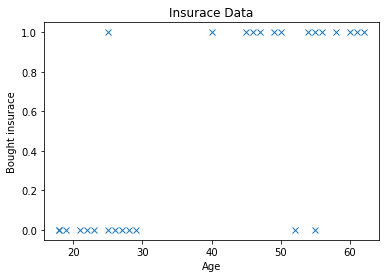

In [99]:
#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("Age")
plt.ylabel("Bought insurace")
plt.title("Insurace Data")

Batch Gradient Ascent

In [100]:
def hypot(theta,x_i):
    ans = (-1)*(theta[0]*x_i[0] + theta[1]*x_i[1])
    return (1/(1+exp(ans)))

In [101]:
def log_likelihood(theta,x_data,y_data):
    m = len(x_data[0])    #number of training examples
    ll = 0
    for i in range(m):
        h_theta_xi = hypot(theta,[x_data[0][i],x_data[1][i]])
        ll += (y_data[i])*log(h_theta_xi) + (1 - y_data[i])*log(1 - h_theta_xi)
    return ll

In [102]:
def BGD(x_data,y_data,theta,learning_rate,precision_value):
    n = len(x_data)    #number of parameters 
    m = len(x_data[0])    #number of training examples
    
    while True:
        ll_before = log_likelihood(theta,x_data,y_data)

        for j in range(n):  # iterating over all parameters
            grad=0
            for i in range(m):  # iterating over all training examples
                grad += ((y_data[i] - hypot(theta,[1,x_data[1][i]]))*(x_data[j][i]))
            theta[j] = theta[j] + learning_rate*grad

        ll_after = log_likelihood(theta,x_data,y_data)

        if (abs(ll_before-ll_after)<precision_value):  # convergence condition
            break

    return theta

Text(0.5, 1.0, 'Insurace Data')

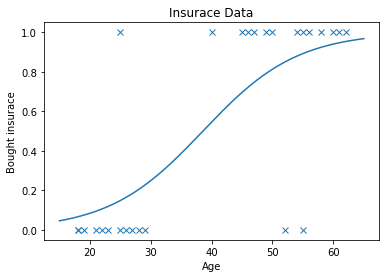

In [109]:
theta = BGD(x_list,y_list,[0,0],0.0001,0.000001)

#plot of hypothesis function
x = np.linspace(15,65,10000) 

y_lst = []
for val in x:
    y_val = hypot(theta,[1,val])
    y_lst.append(y_val)

y = np.array(y_lst)

plt.plot(x,y)

#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("Age")
plt.ylabel("Bought insurace")
plt.title("Insurace Data")